In [2]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import itertools
from scipy.stats import spearmanr,pearsonr

def hist(vals,bins,linestyle='-',label='',color=None):
    a,b= np.histogram(vals,bins)
    bin_centers = 0.5*(b[1:]+b[:-1])
    plt.plot(bin_centers,a/np.sum(a),linestyle=linestyle,label=label,color=color)
    
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    return [list(lst[i:i + n]) for i in range(0, len(lst), n)]

In [3]:
samples=['p2_gen', 'p2_++', 'p2_CD8+', 'p2_Treg', 'p2_Tconv', 'p22_gen','p22_++', 'p22_CD8+', 'p22_Treg', 'p22_Tconv', 'p23_gen', 'p23_++',
       'p23_CD8+', 'p23_Treg', 'p23_Tconv', 'p24_gen', 'p24_++','p24_CD8+', 'p24_Treg', 'p24_Tconv', 'p25_gen', 'p25_++',
       'p25_CD8+', 'p25_Treg', 'p25_Tconv', 'p26_gen', 'p26_++','p26_CD8+', 'p26_Treg', 'p26_Tconv', 'p27_gen', 'p27_++',
       'p27_CD8+', 'p27_Treg', 'p27_Tconv', 'p32_gen', 'p32_++','p32_CD8+', 'p32_Treg', 'p32_Tconv', 'p36_gen', 'p36_++',
       'p36_CD8+', 'p36_Treg', 'p36_Tconv']
pgens=pd.read_csv('results/pgens.csv.gz')
pposts=pd.read_csv('results/pposts.csv.gz')
qs=pd.read_csv('results/qs.csv.gz')
patients=[s.split('_')[0] for s in samples]
cell_types=[s.split('_')[1] for s in samples]

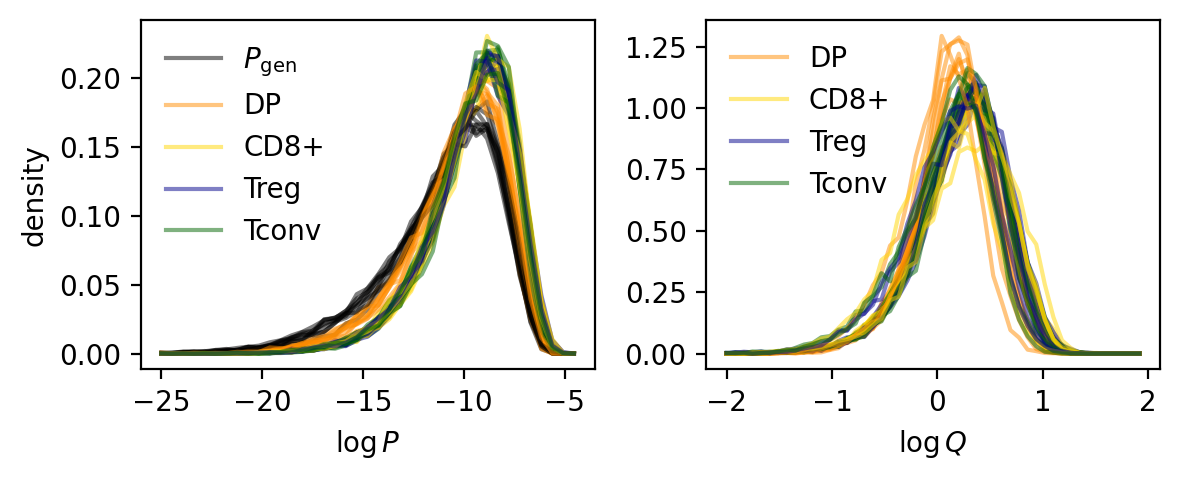

In [5]:
colors_dict={'++':'darkorange', 'CD8+':'gold', 'Tconv':'darkgreen', 'Treg':'darkblue', 'gen':'black'}
names_dict={'++':'DP', 'CD8+':'CD8+', 'Tconv':'Tconv', 'Treg':'Treg', 'gen':r'$P_{\rm gen}$'}
fig = plt.figure(figsize=(6,2.5),dpi=200)
plt.subplot(121)
for i in range(len(samples)):
    a,b=np.histogram(pposts.values[i],np.linspace(-25,-4,40),density=True)
    plt.plot(b[:-1],a,color=colors_dict[cell_types[i]],alpha=0.5,label=names_dict[cell_types[i]] if i<5 else '')
plt.legend(frameon=False)
plt.xlabel(r'$\log P$')
plt.ylabel('density')
plt.subplot(122)

for i in range(len(samples)):
    if cell_types[i]!='gen':
        a,b=np.histogram(qs.values[i],np.linspace(-2,2,50),density=True)
        plt.plot(b[:-1],a,color=colors_dict[cell_types[i]],alpha=0.5,label=names_dict[cell_types[i]] if i<5 else '')
plt.legend(frameon=False)
plt.xlabel(r'$\log Q$')
plt.tight_layout()
plt.show()

In [6]:
entropies=-np.mean(pposts.values/np.log10(2),axis=1)
df1=pd.DataFrame(zip(entropies,np.array(cell_types)),columns=['entropy','cell type'])
correlations=[]
for i in range(len(samples)):
    correlations.append(pearsonr(qs.values[i],pgens.values[i])[0])
final_values=np.array(chunks(correlations,5))[:,1:].flatten()
cell_type=['++', 'CD8+', 'Treg', 'Tconv'] * 9
names_dict={'++':'DP', 'CD8+':'CD8+', 'Tconv':'Tconv', 'Treg':'Treg', 'gen':r'$P_{\rm gen}$'}
df=pd.DataFrame(zip(final_values,[names_dict[c] for c in cell_type]),columns=['rho','cell_type'])

/global/homes/g/giuliois/.conda/envs/msprime/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


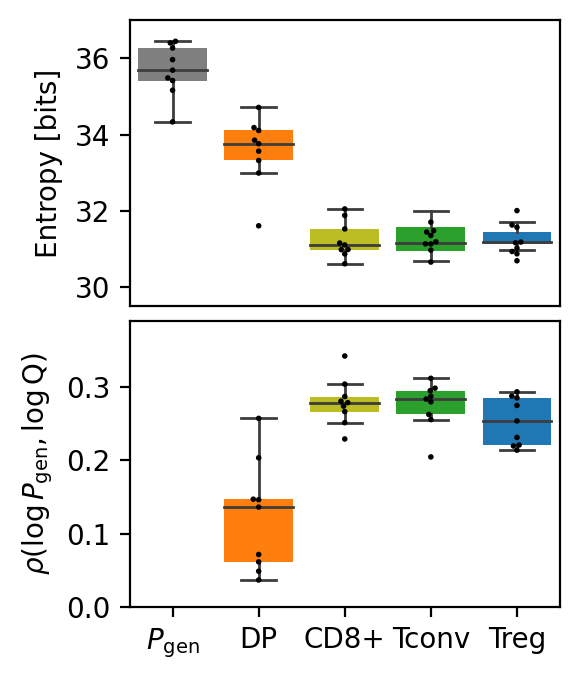

In [7]:
order=['gen','++','CD8+','Tconv','Treg']
names=[r'$P_{\rm gen}$','DP','CD8+','Tconv','Treg']
colors=['black','darkorange','gold','darkgreen','darkblue']
palette=sns.color_palette()
colors=[palette[i] for i in [7,1,8,2,0]]
fig = plt.figure(figsize=(3,3.5),dpi=200)
ax=plt.subplot(211)
plt.locator_params(nbins=4)
sns.boxplot(x='cell type', y="entropy",ax=ax, order=order,data=df1,palette=colors,linewidth=1,fliersize=0,width=0.8,saturation=1,boxprops={"linewidth": 0})
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
sns.swarmplot(x='cell type', y="entropy", data=df1,color='k',size=1,edgecolor='k',linewidth=1.,orient='v')
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_alpha(0)

plt.xticks(np.arange(len(names)),names)
plt.ylim([29.5,37.])
plt.xlabel('')
plt.yticks([30,32,34,36],[30,32,34,36])
plt.ylabel('Entropy [bits]')
plt.xticks([],[])

ax=plt.subplot(212)
plt.locator_params(nbins=4)
sns.boxplot(x='cell_type', y="rho",ax=ax, order=names,data=df,palette=colors,linewidth=1,fliersize=0,width=0.8,saturation=1,boxprops={"linewidth": 0})
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
sns.swarmplot(x='cell_type', y="rho", data=df,order=names,color='k',size=1,edgecolor='k',linewidth=1.,orient='v')
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_alpha(0)

plt.xticks(np.arange(len(names)),names)
plt.ylabel(r'$\rho(\log P_{\rm gen},\log {\rm Q})$')
plt.xlabel('')
plt.ylim([0.,0.39])
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()